In [18]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
# Read the dataset.
import pandas as pd
df = pd.read_excel('IEA_EDGAR_CO2_m_1970_2023.xlsx','IPCC 2006',header=9)
df.head()

,IPCC_annex,C_group_IM24_sh,Country_code_A3,Name,ipcc_code_2006_for_standard_report,ipcc_code_2006_for_standard_report_name,fossil_bio,Substance,Year,Jan,...,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,Non-Annex_I,Rest Central America,ABW,Aruba,1.A.3.a,Civil Aviation,fossil,CO2,1970,0.062856,...,0.062856,0.062856,0.062856,0.062856,0.062856,0.062856,0.062856,0.062856,0.062856,0.062886
1,Non-Annex_I,Rest Central America,ABW,Aruba,1.A.3.b_noRES,Road Transportation no resuspension,fossil,CO2,1970,0.076649,...,0.084309,0.087701,0.089679,0.090324,0.090189,0.089689,0.089554,0.092759,0.088628,0.081488
2,Non-Annex_I,Rest Central America,ABW,Aruba,2.A.3,Glass Production,fossil,CO2,1970,0.000251,...,0.000258,0.000254,0.000247,0.000246,0.000233,0.000221,0.000233,0.000249,0.000253,0.000257
3,Non-Annex_I,Rest Central America,ABW,Aruba,1.A.1.a,Main Activity Electricity and Heat Production,fossil,CO2,1970,1.362695,...,1.541855,1.437967,1.723444,1.369632,1.439874,1.461207,1.362175,1.390271,1.344137,1.486702
4,Non-Annex_I,Rest Central America,ABW,Aruba,1.A.5,Non-Specified,fossil,CO2,1970,0.426613,...,0.426613,0.426613,0.426613,0.426613,0.426613,0.426613,0.426613,0.426613,0.426613,0.426818


In [20]:
# Get the entries from January 2013 to December 2022.
dg = df.loc[(df['Substance'] == 'CO2') & (df['Year'] > 2012) & (df['Year'] < 2023),['Year','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']].fillna(0)
# Get the monthly mean CO2 levels from January 2013 to December 2022.
dh = dg.groupby('Year').sum().mean()
dh

Jan    3.496598e+06
Feb    3.239362e+06
Mar    3.241729e+06
Apr    2.992881e+06
May    2.889004e+06
Jun    2.855867e+06
Jul    2.898497e+06
Aug    2.882346e+06
Sep    2.846371e+06
Oct    3.045781e+06
Nov    3.233353e+06
Dec    3.476574e+06
dtype: float64

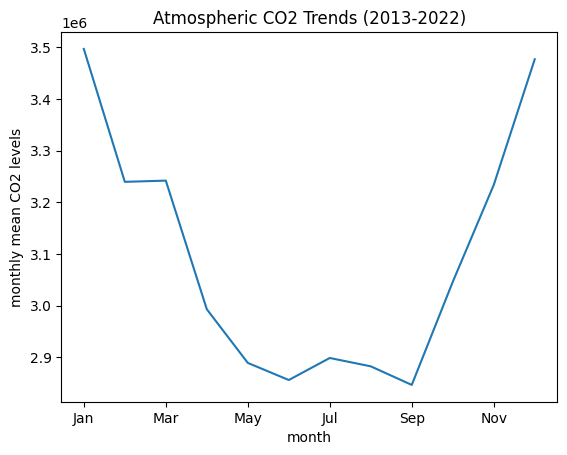

In [21]:
# Plot the monthly mean CO2 levels from January 2013 to December 2022
import matplotlib.pyplot as plt
dh.plot(xlabel='month',ylabel='monthly mean CO2 levels',title='Atmospheric CO2 Trends (2013-2022)')
plt.savefig('CO2.png')
plt.show()